# 01 Random agent baseline

#### 👉Before you try to solve a Reinforcement Learning problem you should get a grasp of its difficulty.

#### 👉 To do so, you need to design a dummy agent that can peform the task without much brains, and evaluate its performance.

#### 👉A simple way to do so is by defining an agent that uses a fixed set of rules to navigate its enviorment.

In [165]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Admin\Documents\hands-on-rl\.conda\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Environment 🌎

In [166]:
import gymnasium as gym
import numpy as np
env = gym.make("Taxi-v3", render_mode="ansi")

## Rule-based agent 🤖🍷

In [167]:
class RuleBasedAgent:
    """
    This taxi driver selects actions randomly.
    You better not get into this taxi!
    """
    def __init__(self, env):
        self.env = env

    def get_action(self, state) -> int:
        """
        We have `state` as an input to keep
        a consistent API for all our agents.
        This agent deterministically follows a fixed set of rules.
        """
        env=self.env.unwrapped
        taxi_row, taxi_col, pass_loc, dest_loc = env.decode(state)
        #get coordinates for pass_loc and dest_loc
        # print(taxi_row, taxi_col, pass_loc, dest_loc)
        # print(env.locs)
        if pass_loc == 4:
            pass_loc_coords=[taxi_row, taxi_col]
        else:
            pass_loc_coords = env.locs[pass_loc]
        dest_loc_coords = env.locs[dest_loc]
        print(f"Taxi position: ({taxi_row}, {taxi_col})")
        print(f"Passenger location: {pass_loc_coords}")
        print(f"Destination location: {dest_loc_coords}")
        # Walls are present in env.desc
        walls = env.desc

        # Helper functions to check walls and avoid out-of-bounds moves

        def can_move_north(row, col):
            """ Check if moving north is within bounds and not blocked by a wall """
            return row > 0

        def can_move_south(row, col):
            """ Check if moving south is within bounds and not blocked by a wall """
            return row < 4

        def can_move_east(row, col):
            """ Check if moving east is within bounds and not blocked by a wall """
            return col < 4 and walls[row, col + 1] != b"|"

        def can_move_west(row, col):
            """ Check if moving west is within bounds and not blocked by a wall """
            return col > 0 and walls[row, col - 1] != b"|"

        # Determine if the passenger is already picked up (pass_loc == 4)
        if pass_loc != 4:
            # Move towards the passenger's location
            pass_row, pass_col = pass_loc_coords

            # Align the row with the passenger, avoiding walls and out-of-bounds moves
            if taxi_row < pass_row and can_move_south(taxi_row, taxi_col):
                return 0  # Move south
            elif taxi_row > pass_row and can_move_north(taxi_row, taxi_col):
                return 1  # Move north
        
            # Align the column with the passenger, avoiding walls and out-of-bounds moves
            if taxi_col < pass_col:
                if can_move_east(taxi_row, taxi_col):
                    return 2  # Move east
            elif taxi_col > pass_col and can_move_west(taxi_row, taxi_col):
                return 3  # Move west

            # If the taxi is at the passenger's location, pick them up
            return 4  # Pickup

        else:
            # Move towards the destination's location, avoiding walls and out-of-bounds moves
            dest_row, dest_col = dest_loc_coords

            # First align the row with the destination, avoiding walls and out-of-bounds moves
            if taxi_row < dest_row and can_move_south(taxi_row, taxi_col):
                return 0  # Move south
            elif taxi_row > dest_row and can_move_north(taxi_row, taxi_col):
                return 1  # Move north

            # Then align the column with the destination, avoiding walls and out-of-bounds moves
            if taxi_col < dest_col and can_move_east(taxi_row, taxi_col):
                return 2  # Move east
            elif taxi_col > dest_col and can_move_west(taxi_row, taxi_col):
                return 3  # Move west

            # If the taxi is at the destination, drop off the passenger
            return 5  # Dropoff

agent = RuleBasedAgent(env)

## Let's evaluate this driver starting from a fixed `state = 123`

In [168]:
# set initial state of the environment
state, _ = env.reset(seed=123)

epochs = 0
penalties = 0  # wrong pick up or dropp off
reward = 0

# store frames to latter plot them
frames = []

done = False

while not done:
    
    action = agent.get_action(state)
    
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    if reward == -10:
        penalties += 1
    
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Taxi position: (3, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (2, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (1, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination location: (0, 4)
Taxi position: (0, 2)
Passenger location: (0, 0)
Destination loc

In [169]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1} of {len(frames)}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.05)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Timestep: 200 of 200
State: 41
Action: 3
Reward: -1


#### Pretty bad driving, isn't it?

## Let's generate histograms to quantify performance

In [170]:
from tqdm import tqdm

n_episodes = 100

# For plotting metrics
timesteps_per_episode = []
penalties_per_episode = []

for i in tqdm(range(0, n_episodes)):
    
    # reset environment to a random state
    state, _ = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        
        action = agent.get_action(state)       
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
               
        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
    
    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)

 40%|████      | 40/100 [00:00<00:00, 399.48it/s]

Taxi position: (1, 0)
Passenger location: (4, 0)
Destination location: (4, 3)
Taxi position: (2, 0)
Passenger location: (4, 0)
Destination location: (4, 3)
Taxi position: (3, 0)
Passenger location: (4, 0)
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: (4, 0)
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination location: (4, 3)
Taxi position: (4, 0)
Passenger location: [4, 0]
Destination loc

100%|██████████| 100/100 [00:00<00:00, 378.80it/s]

Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination location: (0, 4)
Taxi position: (0, 1)
Passenger location: [0, 1]
Destination loc

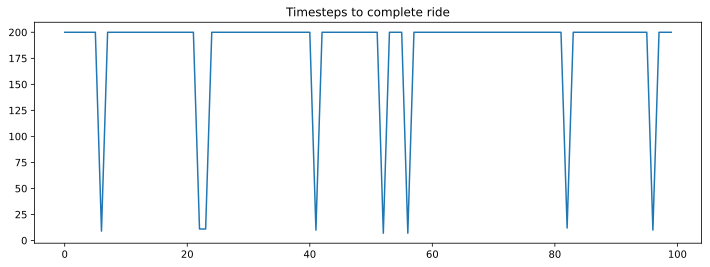

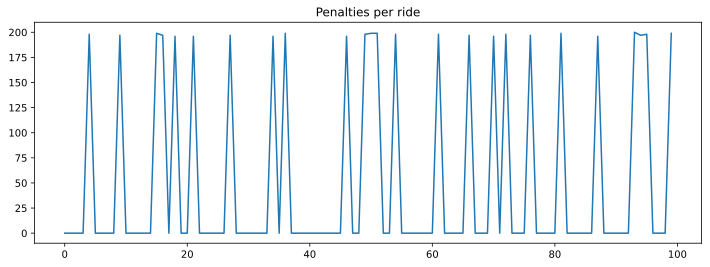

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()

In [172]:
print(f'Avg steps to complete ride: {np.array(timesteps_per_episode).mean()}')
print(f'Avg penalties to complete ride: {np.array(penalties_per_episode).mean()}')

Avg steps to complete ride: 184.77
Avg penalties to complete ride: 49.4


## Bonus: This agent is very unsuccessful so far. What can you do to improve the current strategy?

In [173]:
class ImprovedAgent:
    """
    This taxi driver selects actions randomly.
    You better not get into this taxi!
    """
    def __init__(self, env):
        self.env = env

    def get_action(self, state) -> int:
        """
        We have `state` as an input to keep
        a consistent API for all our agents.
        """
        

agent = ImprovedAgent(env)